# Bevibene - Advertising Analysis

In [33]:
##################################################################
# Environment
##################################################################
# set the log level to to iPhython
%config Application.log_level='ERROR'

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# local functions
def export_csv_file(df, file_name):
    df.to_csv(file_name,
              header=True,
              float_format='%.4f',
              index=True,
              sep='\t'
              )


In [34]:
##################################################################
# Load Data adn Rename Columns
##################################################################

# Load the data
file_path = './datasets/report-amazon-1.xlsx'
data = pd.read_excel(file_path, sheet_name='Sponsored Product Search Term R')

# create a list with the new column names
new_columns = [
    "date", 
    "portfolio_name", 
    "currency", 
    "campaign_name",
    "ad_group_name",
    "keyword",
    "match_type",
    "customer_search_term", 
    "impressions", 
    "clicks",
    "ctr", 
    "cost_per_click", 
    "spend", 
    "7_day_sales",
    "total_advertising_cost_of_sales_acos",
    "return_on_ad_spend_roas",
    "7_day_orders",
    "7_day_units_sold",
    "7_day_conversion_rate",
    "7_day_advertised_sku_units", 
    "7_day_other_sku_units",
    "7_day_advertised_sku_sales",
    "7_day_other_sku_sales"
]

# create a dataframe with the original name list and new name list to check if they are the same
compare_columns = pd.DataFrame({
    'actual_columns': data.columns,
    'new_columns': new_columns
})

# export_csv_name = "./exports/compare_columns.csv"
# export_csv_file(df, compare_columns)

# Rename the columns
data.columns = new_columns

# Check the first rows of the data
data.head()

/opt/anaconda3/envs/investment-desk/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,date,portfolio_name,currency,campaign_name,ad_group_name,keyword,match_type,customer_search_term,impressions,clicks,...,7_day_sales,total_advertising_cost_of_sales_acos,return_on_ad_spend_roas,7_day_orders,7_day_units_sold,7_day_conversion_rate,7_day_advertised_sku_units,7_day_other_sku_units,7_day_advertised_sku_sales,7_day_other_sku_sales
0,2024-10-14,No Portfolio,BRL,SP [Manual] - Produtos com vendas - ONB eff61c,Bevibene - Other,limoncello,PHRASE,caravelle licor italiano 750ml limoncello,3,1,...,0,NaN,0.0,0,0,0.0,0,0,0,0
1,2024-11-08,No Portfolio,BRL,SP [Manual] - Produtos com vendas - ONB eff61c,Bevibene - Other,limoncello,PHRASE,licor limoncello,11,1,...,0,NaN,0.0,0,0,0.0,0,0,0,0
2,2024-10-15,No Portfolio,BRL,SP [Manual] - Produtos com vendas - ONB eff61c,Bevibene - Other,limoncello,PHRASE,limoncello,9,1,...,0,NaN,0.0,0,0,0.0,0,0,0,0
3,2024-10-17,No Portfolio,BRL,SP [Manual] - Produtos com vendas - ONB eff61c,Bevibene - Other,limoncello,PHRASE,limoncello,14,1,...,0,NaN,0.0,0,0,0.0,0,0,0,0
4,2024-10-19,No Portfolio,BRL,SP [Manual] - Produtos com vendas - ONB eff61c,Bevibene - Other,limoncello,PHRASE,limoncello,39,1,...,0,NaN,0.0,0,0,0.0,0,0,0,0


In [36]:
##################################################################
# Data Cleaning
##################################################################

# Calculate metrics for analysis
data['ctr'] = data['clicks'] / data['impressions'] * 100
data['cpc'] = data['cost_per_click'] / data['clicks']

# Group by keywords and campaigns for analysis
keyword_performance = data.groupby('keyword').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'ctr': 'mean',
    'cpc': 'mean',
    '7_day_sales': 'sum',
    'total_advertising_cost_of_sales_acos': 'mean',
    'return_on_ad_spend_roas': 'mean'
}).reset_index()

campaign_performance = data.groupby('campaign_name').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'ctr': 'mean',
    'cpc': 'mean',
    '7_day_sales': 'sum',
    'total_advertising_cost_of_sales_acos': 'mean',
    'return_on_ad_spend_roas': 'mean'
}).reset_index()

keyword_performance.head(), campaign_performance.head()

(      keyword  impressions  clicks        ctr       cpc  7_day_sales  \
 0           *         1300     103  31.922362  0.536692          160   
 1  limoncello         3217     205  23.711913  0.532230         1025   
 
    total_advertising_cost_of_sales_acos  return_on_ad_spend_roas  
 0                              0.007500                 3.947368  
 1                              0.030484                 9.831501  ,
                                     campaign_name  impressions  clicks  \
 0            SP Entire Catalog 07-nov-2023 5aaa81         1300     103   
 1  SP [Manual] - Produtos com vendas - ONB eff61c         3217     205   
 
          ctr       cpc  7_day_sales  total_advertising_cost_of_sales_acos  \
 0  31.922362  0.536692          160                              0.007500   
 1  23.711913  0.532230         1025                              0.030484   
 
    return_on_ad_spend_roas  
 0                 3.947368  
 1                 9.831501  )

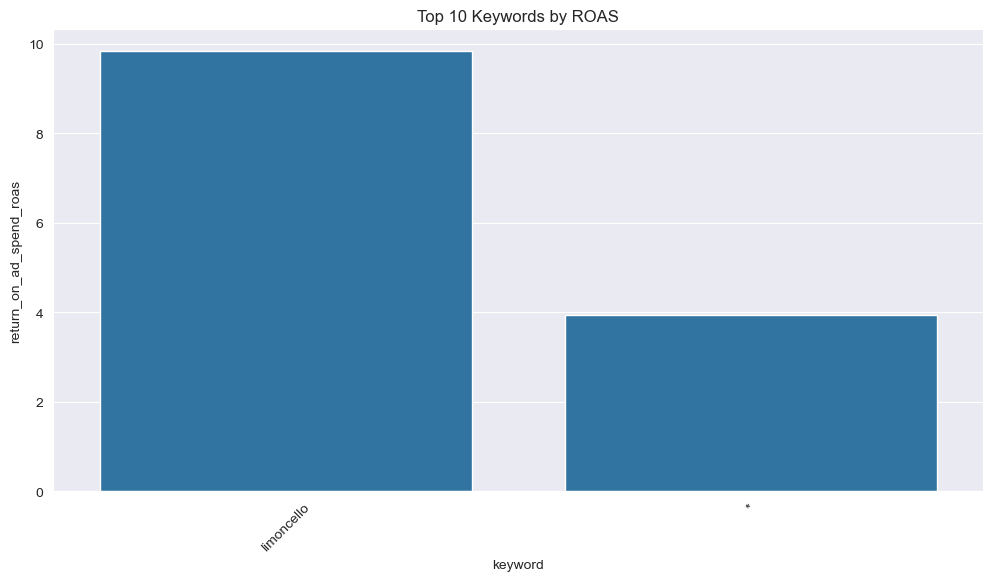

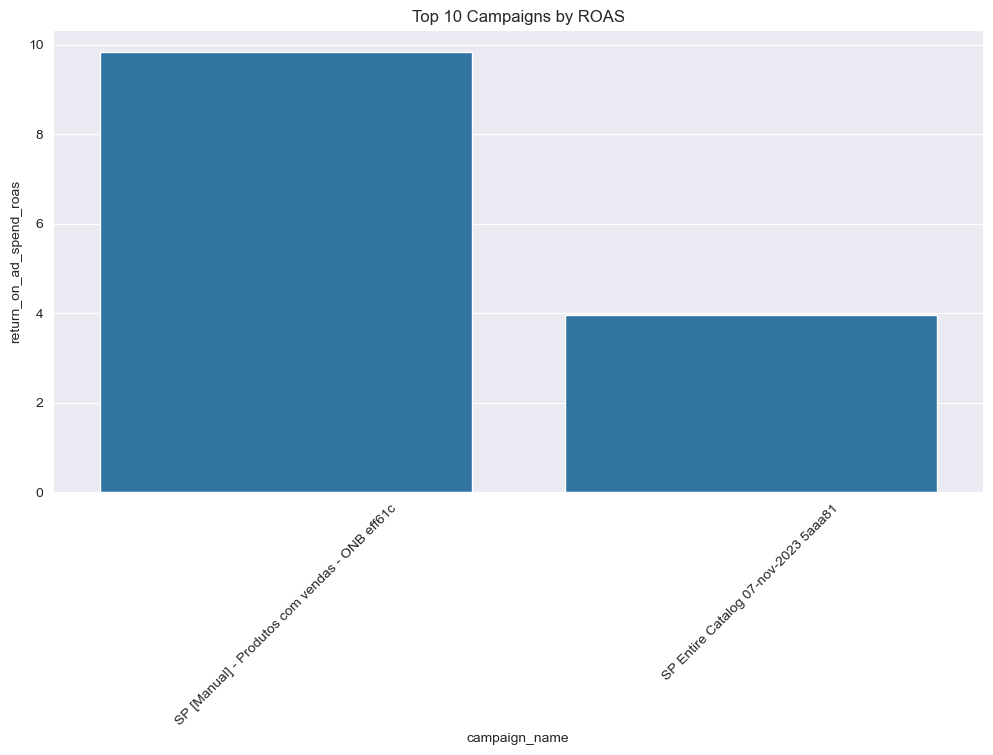

customer_search_term
limoncello                   53
limoncello licor italiano    25
licor limoncello              7
limoncello bebida             7
lemoncello                    4
limoncello bottega            4
limoncello italiano           3
limoncello licor              2
b07x6hw8nh                    2
cerveja artesanal             1
Name: count, dtype: int64

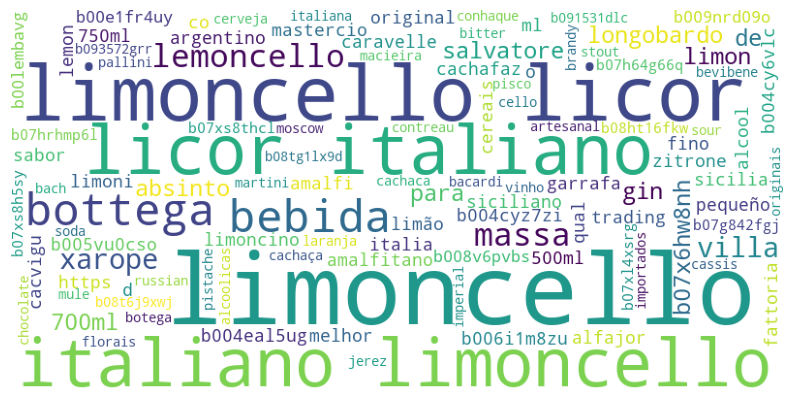

In [39]:
# Visualization for top keywords and campaigns by ROAS and ACOS
plt.figure(figsize=(12, 6))
sns.barplot(x='keyword', y='return_on_ad_spend_roas', data=keyword_performance.sort_values(by='return_on_ad_spend_roas', ascending=False).head(10))
plt.title('Top 10 Keywords by ROAS')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_name', y='return_on_ad_spend_roas', data=campaign_performance.sort_values(by='return_on_ad_spend_roas', ascending=False).head(10))
plt.title('Top 10 Campaigns by ROAS')
plt.xticks(rotation=45)
plt.show()

# Highlight keywords and campaigns to discontinue based on low performance metrics
low_roas_keywords = keyword_performance[keyword_performance['return_on_ad_spend_roas'] < 1]
low_roas_campaigns = campaign_performance[campaign_performance['return_on_ad_spend_roas'] < 1]

low_roas_keywords, low_roas_campaigns


# create a key cloud with the customer_search_term data
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['customer_search_term']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')

# resume the top 10 keywords
top_keywords = data['customer_search_term'].value_counts().head(10)
top_keywords

